# Earthquake

In [1]:
import numpy as np
import pandas as pd
from astropy.time import Time 
import ephem

import matplotlib.pyplot as plt

%matplotlib inline

### Data

Downloaded from https://earthquake.usgs.gov 

- magnitude > 4.5
- region around java island and Sunda/Java trench
- time: from 1988 - 2017 (30 years)

In [2]:
filename = "lombok_02.csv"

data = pd.read_csv(filename)

In [3]:
data[0:5]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-08-10T15:57:41.400Z,-8.0953,116.4342,35.0,4.8,mb,NaN,64,2.289,1.09,...,2018-08-10T23:17:26.652Z,"14km NNE of Karanggedang, Indonesia",earthquake,8.0,2.0,0.101,30,reviewed,us,us
1,2018-08-09T20:33:04.780Z,-8.3426,116.5974,17.6,4.6,mb,NaN,81,2.422,0.67,...,2018-08-10T03:39:47.753Z,"5km SW of Belanting, Indonesia",earthquake,5.3,5.6,0.107,26,reviewed,us,us
2,2018-08-09T05:25:31.910Z,-8.3939,116.2078,10.0,5.9,mww,NaN,14,2.035,1.43,...,2018-08-10T21:13:25.643Z,"3km SE of Todo, Indonesia",earthquake,5.8,1.7,0.073,18,reviewed,us,us
3,2018-08-08T02:10:56.330Z,-8.4413,116.1294,35.0,4.5,mb,NaN,63,1.956,0.89,...,2018-08-10T16:41:36.019Z,"4km SE of Karangsubagan, Indonesia",earthquake,3.5,2.0,0.150,13,reviewed,us,us
4,2018-08-07T06:01:13.730Z,-8.4040,116.0060,35.0,4.5,mb,NaN,74,1.835,0.95,...,2018-08-08T02:26:16.444Z,"10km W of Karangsubagan, Indonesia",earthquake,8.5,2.0,0.127,18,reviewed,us,us


In [4]:
time   = data['time']
lat = data['latitude']
lon = data['longitude']
mag = data['mag']

t = Time(time.tolist(), format='isot', scale='utc') # input to astropy
t_jd = t.jd # convert to JD

Text(0,0.5,'Magnitude')

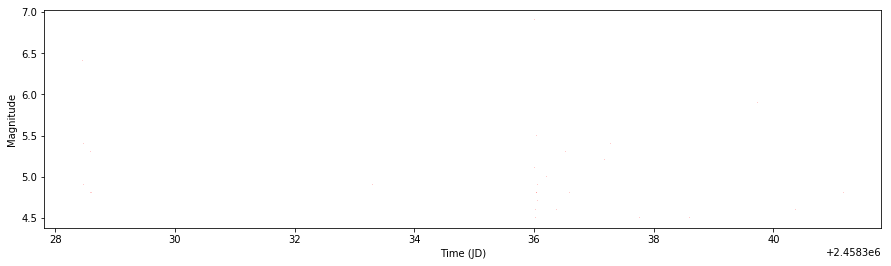

In [5]:
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.plot(t_jd, mag, 'r,', alpha=0.2)
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Magnitude")

#### Perihelion and Aphelion of the Earth
The Earth is at perihelion (closest distance with the Sun) around 4 January, and at aphelion around 4 July.

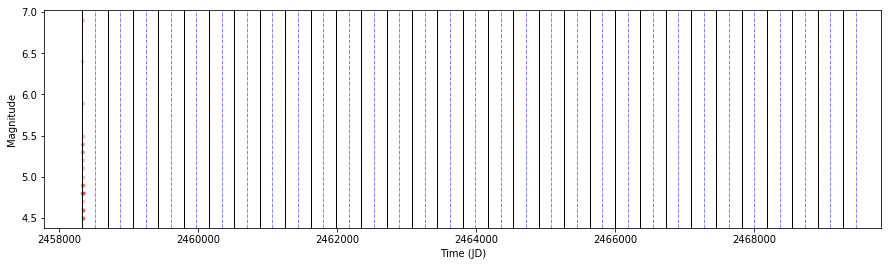

In [6]:
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.plot(t_jd, mag, 'r.', alpha=0.2)
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Magnitude")

# make some vertical lines around the time of perihelion and aphelion
for i in range(31):
    peri = t_jd[-1] + i*365.25
    aphe = t_jd[-1] + 182.625 + i*365.25
    plt.axvline(x=peri, linewidth=1.0, color='black')
    plt.axvline(x=aphe, linewidth=0.5, linestyle='dashdot', color="blue")

We can see from that plot 
- some earthquakes are clustered around the time of Earth at perihelion and aphelion.
- some of the biggest earthquakes also happened around that time.

**Hypothesis**: frequent or big earthquake happened in Desember/January and June/July.

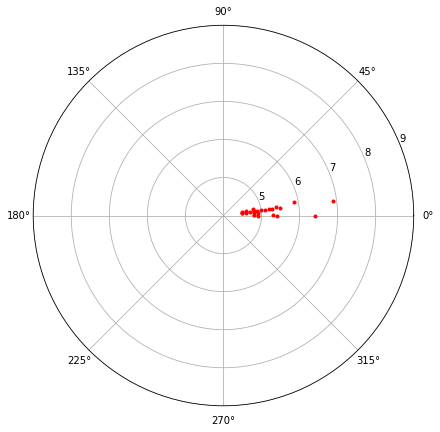

In [7]:
t_folded = (t_jd - t_jd[-1])  % 365.25

theta = t_folded/365.25 * 2 * np.pi

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, mag, 'r.', alpha=1) # magnitude as radius
ax.set_rmin(4.0)
ax.set_rmax(9.0)
ax.grid(True)
plt.show()

### Let's look at the longer data and try to fold the data

- use longer data, t > 1920
- region:
    - Lat: [-12.117, -5.266]
    - Lon: [102.656, 120.41]
- mag > 5.5
- use anomalistic year: T = 365.2597 to fold the data

In [8]:
# read
filename = "chile.csv"
data = pd.read_csv(filename)

In [9]:
data[-5:]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
16470,1914-01-30T03:35:45.000Z,-36.292,-75.057,15.0,7.6,mw,NaN,NaN,NaN,NaN,...,2015-07-13T17:02:22.000Z,"off the coast of Bio-Bio, Chile",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
16471,1913-08-06T22:14:37.000Z,-16.469,-73.823,25.0,7.7,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:41.000Z,near the coast of southern Peru,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
16472,1906-09-28T15:24:41.000Z,-4.144,-77.273,100.0,6.8,mw,NaN,NaN,NaN,NaN,...,2015-07-13T17:02:22.000Z,northern Peru,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
16473,1906-08-17T00:40:04.000Z,-32.400,-71.400,35.0,8.2,mw,NaN,NaN,NaN,NaN,...,2015-07-13T17:02:22.000Z,"Valparaiso, Chile",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
16474,1906-01-31T15:36:10.000Z,0.955,-79.369,20.0,8.8,mw,NaN,NaN,NaN,NaN,...,2018-02-14T23:07:34.956Z,near the coast of Ecuador,earthquake,NaN,NaN,NaN,NaN,reviewed,iscgem,official


In [10]:
time   = data['time']
lat = data['latitude']
lon = data['longitude']
mag = data['mag']

t = Time(time.tolist(), format='isot', scale='utc') # input to astropy
t_jd = t.jd # convert to JD

Text(0,0.5,'Magnitude')

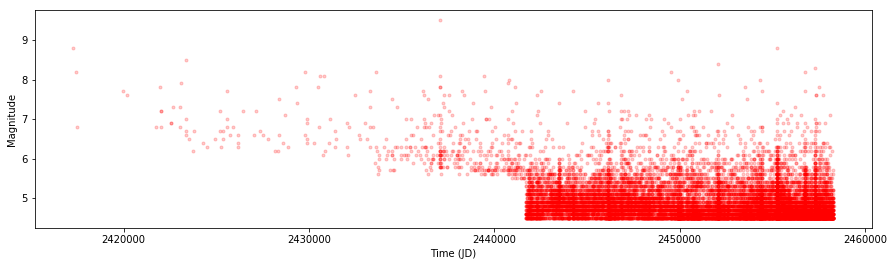

In [11]:
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.plot(t_jd, mag, 'r.', alpha=0.2)
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Magnitude")

# make some vertical lines around the time of perihelion and aphelion
# for i in range(97):
#     peri = t_jd[-1] + i*365.25
#     aphe = t_jd[-1] + 182.625 + i*365.25
#     plt.axvline(x=peri, linewidth=1.0, color='black')
#     plt.axvline(x=aphe, linewidth=0.5, linestyle='dashdot', color="blue")

### t > 1973

In [12]:
# read
filename = "chile.csv"
data = pd.read_csv(filename)

data[-5:]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
16470,1914-01-30T03:35:45.000Z,-36.292,-75.057,15.0,7.6,mw,NaN,NaN,NaN,NaN,...,2015-07-13T17:02:22.000Z,"off the coast of Bio-Bio, Chile",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
16471,1913-08-06T22:14:37.000Z,-16.469,-73.823,25.0,7.7,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:41.000Z,near the coast of southern Peru,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
16472,1906-09-28T15:24:41.000Z,-4.144,-77.273,100.0,6.8,mw,NaN,NaN,NaN,NaN,...,2015-07-13T17:02:22.000Z,northern Peru,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
16473,1906-08-17T00:40:04.000Z,-32.400,-71.400,35.0,8.2,mw,NaN,NaN,NaN,NaN,...,2015-07-13T17:02:22.000Z,"Valparaiso, Chile",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
16474,1906-01-31T15:36:10.000Z,0.955,-79.369,20.0,8.8,mw,NaN,NaN,NaN,NaN,...,2018-02-14T23:07:34.956Z,near the coast of Ecuador,earthquake,NaN,NaN,NaN,NaN,reviewed,iscgem,official


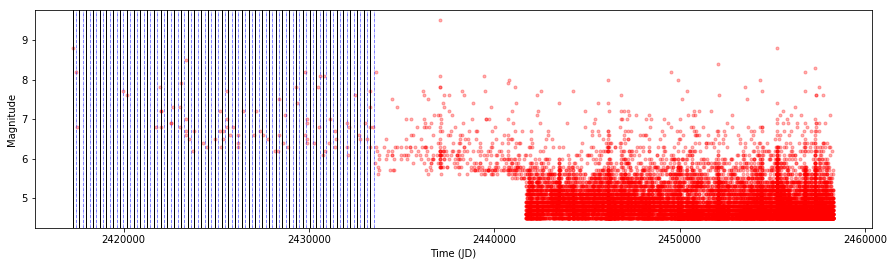

In [13]:
time   = data['time']
lat = data['latitude']
lon = data['longitude']
mag = data['mag']

t = Time(time.tolist(), format='isot', scale='utc') # input to astropy
t_jd = t.jd # convert to JD


fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.plot(t_jd, mag, 'r.', alpha=0.3)
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Magnitude")

# make some vertical lines around the time of perihelion and aphelion
for i in range(45):
    peri = t_jd[-1] + i*365.25
    aphe = t_jd[-1] + 182.625 + i*365.25
    plt.axvline(x=peri, linewidth=1.0, color='black')
    plt.axvline(x=aphe, linewidth=0.5, linestyle='dashdot', color="blue")

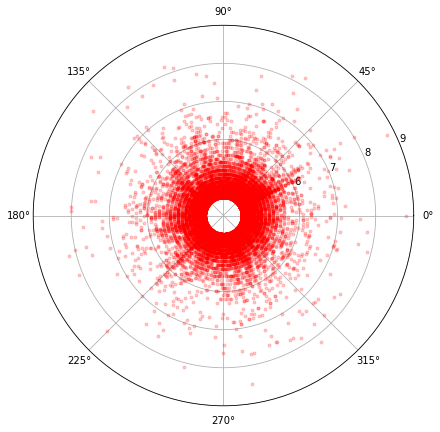

In [14]:
t_folded = (t_jd - t_jd[-1])  % 365.25

theta = t_folded/365.25 * 2 * np.pi

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, mag, 'r.', alpha=0.2) # magnitude as radius
ax.set_rmin(4.0)
ax.set_rmax(9.0)
ax.grid(True)
plt.show()

In [1]:
7.5**2/0.05**2

22499.999999999996